In [2]:
import sys
import os
import shutil
import numpy as np

evalset = ['1J2X_A_18_B', '1GUX_B_9_E', '1LB6_A_9_B', '1OAI_A_9_B', '1SQK_A_25_B', '1WKW_A_20_B', '2G30_A_16_P', '2HPL_A_5_B', '2NM1_A_17_B', '2OKR_A_24_C', '2PEH_A_10_C', '2PUY_B_10_E', '2PV1_A_7_B', '2QN6_A_18_C', '2QOS_C_11_A', '3D9U_A_6_B', '3H8A_A_28_E', '3HBV_P_7_Z', '3LU9_B_25_C', '3MHP_A_26_C', '3O37_A_10_E', '3PLV_A_21_C', '4K0U_A_15_B', '4M5S_A_10_B', '4Q5U_A_24_C', '4QJA_A_10_P', '5CRW_A_11_B', '5EPP_A_15_B', '5FZT_A_23_B']


29
sor:  /home/jsp/pros/peprank/inf_results/4M5S_A_10_B/predictions_sorted.txt
4M5S_A_10_B_model_1005.crt.npz 0.9998 0
sor:  /home/jsp/pros/peprank/inf_results/5FZT_A_23_B/predictions_sorted.txt
5FZT_A_23_B_model_2.crt.npz 0.9988 1
ind:  0
sor:  /home/jsp/pros/peprank/inf_results/2OKR_A_24_C/predictions_sorted.txt
2OKR_A_24_C_model_1.crt.npz 0.9995 0
sor:  /home/jsp/pros/peprank/inf_results/2QN6_A_18_C/predictions_sorted.txt
2QN6_A_18_C_model_65.crt.npz 0.9999 1
ind:  1
sor:  /home/jsp/pros/peprank/inf_results/3MHP_A_26_C/predictions_sorted.txt
3MHP_A_26_C_model_71.crt.npz 0.9962 40
ind:  26
sor:  /home/jsp/pros/peprank/inf_results/4QJA_A_10_P/predictions_sorted.txt
4QJA_A_10_P_model_946.crt.npz 0.9561 17
ind:  17
sor:  /home/jsp/pros/peprank/inf_results/2PV1_A_7_B/predictions_sorted.txt
2PV1_A_7_B_model_7.crt.npz 0.9998 0
sor:  /home/jsp/pros/peprank/inf_results/2G30_A_16_P/predictions_sorted.txt
2G30_A_16_P_model_478.crt.npz 0.9994 1
ind:  0
sor:  /home/jsp/pros/peprank/inf_results/3

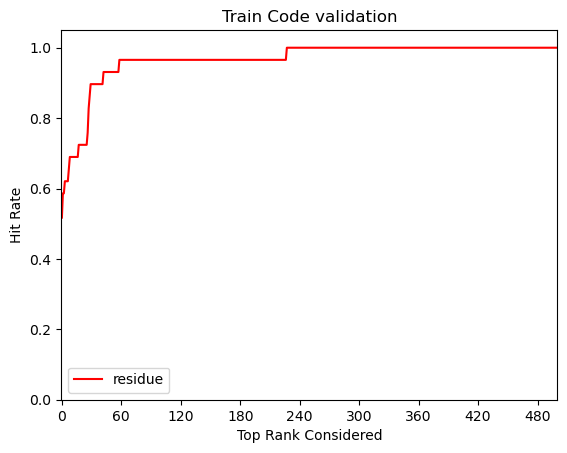

In [7]:
if True:
    graph_xmax = 501

    curdir = os.getcwd()
    infpath = os.path.join(curdir, 'inf_results')
    results=[x for x in os.listdir(infpath) if os.path.isdir(os.path.join(infpath, x))]
    n_datasets = len(results)
    print(n_datasets)
    # the board
    board = [[0] * graph_xmax for _ in range(n_datasets)]
    board2 = [[0] * graph_xmax for _ in range(n_datasets)]
    # # for every txt files
    for i in range(n_datasets):
        
        sor = os.path.join(infpath, results[i], 'predictions_sorted.txt')
        print("sor: ",sor)
        with open(sor,'r') as file:
            lines = file.read().split('\n')
        samesame = 0
        previous = float(lines[0].split('\t')[1])
        ind = 0
        for k in range(1, graph_xmax):
            
            score = float(lines[k].split('\t')[1])
            #print('previous: ', previous)
            #print('score: ', score)
            if score != previous:
                samesame += 1
            previous = score
            board2[i][k] = samesame
        #print(f'board2[{i}]: ', board[i])
        
        for k in range(graph_xmax):
            
            score = float(lines[k].split('\t')[1])
            name = lines[k].split('\t')[0]
                
            # if there is one hit in group, after that rank is always hit.
            if 'crt' in name:
                print(name, score, k)
                # find the first same rank
                for j in range(1,graph_xmax):
                    if board2[i][k] == board2[i][j]:
                        # print(board2[i][k] , board2[i][j])
                        ind = board2[i][j]
                        print('ind: ', ind)
                        break
                # print("the index: ", ind)
                # first rank to ~
                for c in range(ind, graph_xmax):
                    board[i][c] = 1
                
                break
        #print(f'board[{i}]: ', board[i])

#    print(board2[0])
#    print(board[0])

    b = np.array(board)
    c = np.sum(b, axis=0)
#    print('c: ', c)
    c = c/n_datasets
    x = np.arange(0,graph_xmax,5)
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    plt.figure(linewidth = 5)
    plt.xlim(-0.5, graph_xmax-1)
    # how to show only 10 labels in x axis in my plot
#    plt.xticks(x)
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))

    plt.ylim(0,1.05)
    plt.plot(c, color = 'r', label = 'residue')

    plt.xlabel("Top Rank Considered")
    plt.ylabel("Hit Rate")
    plt.title("Train Code validation")
    plt.legend()

